In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Epoch 1, Loss: 0.5563302040100098, Validation Loss: 0.7295057260990143,accuracy 36.0
Epoch 2, Loss: 0.38476741313934326, Validation Loss: 0.7606478261947632,accuracy 36.0
Epoch 3, Loss: 0.2795889675617218, Validation Loss: 0.7796516597270966,accuracy 36.0
Epoch 4, Loss: 0.21871986985206604, Validation Loss: 0.8087707108259201,accuracy 36.0
Epoch 5, Loss: 0.18794453144073486, Validation Loss: 0.8406156265735626,accuracy 36.0
Epoch 6, Loss: 0.1683577448129654, Validation Loss: 0.8607627275586128,accuracy 36.0
Epoch 7, Loss: 0.1624249368906021, Validation Loss: 0.8695692023634911,accuracy 36.0
Epoch 8, Loss: 0.1668672114610672, Validation Loss: 0.8745687383413315,accuracy 36.0
Epoch 9, Loss: 0.17321617901325226, Validation Loss: 0.8733308246731758,accuracy 36.0
Epoch 10, Loss: 0.17064276337623596, Validation Loss: 0.8749110625684261,accuracy 36.0
Epoch 11, Loss: 0.1794869601726532, Validation Loss: 0.8643668332695961,accuracy 36.0
Epoch 12, Loss: 0.18118925392627716, Validation Loss: 0.86

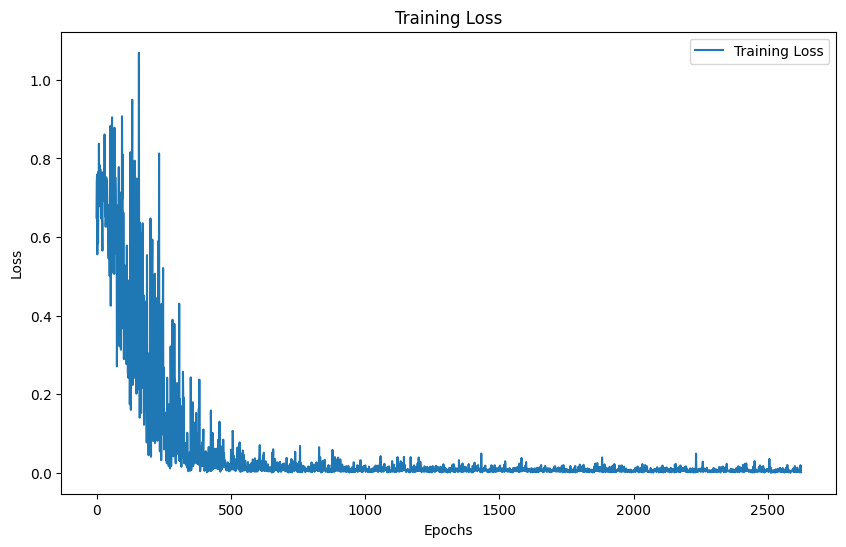

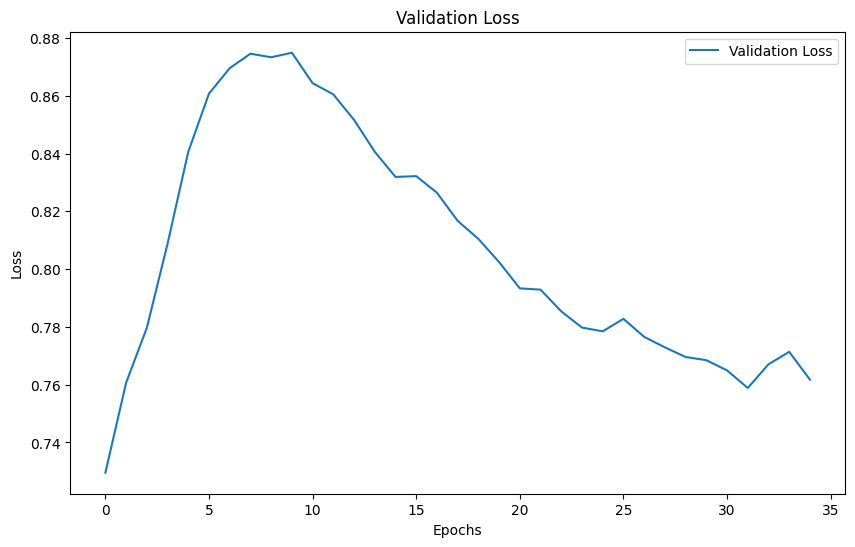

accuracy:  68.0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Define the neural network architecture
class SimpleNN(nn.Module):#with normalization and dropout
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.instancenorm1 = nn.InstanceNorm1d(hidden_size1)  # Instance Normalization after the first layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(min(0.5, dropout_rate * 1.5))  # Increased dropout rate
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.instancenorm2 = nn.InstanceNorm1d(hidden_size2)  # Instance Normalization after the second layer
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(min(0.5, dropout_rate * 1.5))  # Increased dropout rate
        self.layer3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.instancenorm1(out)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.layer2(out)
        out = self.instancenorm2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.layer3(out)
        out = self.sigmoid(out)
        return out
# Hyperparameters
class SimplifiedNN(nn.Module): # a simpler nn
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(SimplifiedNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        # Apply dropout more conservatively
        self.dropout1 = nn.Dropout(min(0.3, dropout_rate))  # Use a lower dropout rate
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.layer2(out)
        out = self.sigmoid(out)
        return out
class ImprovedSimpleNN(nn.Module):#without normaizlation
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_rate=0.3):
        super(ImprovedSimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.norm1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.norm2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.layer3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.layer1(x)
        #x = self.norm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        #x = self.norm2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        return x

input_size = 1620  # Number of input features
hidden_size1 = 800  # Number of neurons in the first hidden layer
hidden_size2 = 200  # Number of neurons in the second hidden layer
output_size = 1  # Single output for binary classification
dropout_rate = 0.3 # Dropout rate
learning_rate = 0.0001  # Learning rate
l2_reg = 0.01


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data

df = pd.read_excel('/content/drive/MyDrive/DeepLearning_Project/data.xlsx', engine='openpyxl') # Adjust the file path
df = df.T
X = df.iloc[:, :].values  # Input features
 # Target variable
df = pd.read_excel('/content/drive/MyDrive/DeepLearning_Project/results.xlsx', engine='openpyxl')
Y = df.iloc[:,2].values

# Standardize the features

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train[:, None], dtype=torch.float32)  # Reshape for BCELoss
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val[:, None], dtype=torch.float32)  # Reshape for BCELoss
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test[:, None], dtype=torch.float32)  # Reshape for BCELoss

# Define the neural network architecture (from the previous example)
# ...
# Create a TensorDataset
dataset_train = TensorDataset(X_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=False)
dataset_vaild = TensorDataset(X_val, y_val)
dataloader_vaild = DataLoader(dataset_vaild, batch_size=1, shuffle=False)
dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=False)

# Initialize the model, loss function, and optimizer
#model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size, dropout_rate)
#model = SimplifiedNN(input_size, hidden_size1, output_size, dropout_rate)
model = ImprovedSimpleNN(input_size, hidden_size1, hidden_size2, output_size, dropout_rate)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate,weight_decay=l2_reg)
model.to(device)

# Training loop
num_epochs = 35  # Adjust the number of epochs
train_losses, val_losses,val_acc = [], [],[]
for epoch in range(num_epochs):
  for inputs, labels in dataloader_train:
    inputs = inputs.to(device)
    labels = labels.to(device)
    model.train()
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation
  model.eval()
  with torch.no_grad():
    val_loss = 0
    accuracy=0
    for inputs, labels in dataloader_vaild:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            if output>=0.5:
              output=1
            else:
              output = 0
            loss = criterion(outputs, labels)
            accuracy+=(output==int(labels))
            val_loss += loss.item()
    val_loss /= len(dataloader_vaild)
    accuracy = int(accuracy)
    accuracy/=len(dataloader_vaild)
    val_losses.append(val_loss)
    val_acc.append(accuracy*100)

    print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss},accuracy {accuracy*100}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()
accuracy=0
for inputs, labels in dataloader_test:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            if output>=0.5:
              output=1
            else:
              output = 0
            accuracy+=(output==int(labels))
accuracy = int(accuracy)
accuracy/=len(dataloader_test)
print("accuracy: ",accuracy*100)


